# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from transformers import AutoConfig
from transformers import AutoTokenizer
from wordcloud import WordCloud
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Data Cleaning

In [ ]:

df = pd.read_excel("/content/WebScarpedDataset_for_DeepSeekchatbot_training.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Source URL  7255 non-null   object
 1   Question    7255 non-null   object
 2   Answer      7255 non-null   object
dtypes: object(3)
memory usage: 170.2+ KB


In [ ]:
df = df.dropna().reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Source URL  7255 non-null   object
 1   Question    7255 non-null   object
 2   Answer      7255 non-null   object
dtypes: object(3)
memory usage: 170.2+ KB


In [ ]:
df.head()

,Source URL,Question,Answer
0,https://aws.amazon.com/amazon-mq/faqs/,Can I change the default broke configurations ...,"Yes, Amazon MQ allows you to create custom con..."
1,https://aws.amazon.com/amazon-mq/faqs/,Do I need to provision and pay for broker boot...,"No, each broker you provision includes boot vo..."
2,https://aws.amazon.com/amazon-mq/faqs/,Do I pay for inter-node data transfer on Amazo...,"No, all inter-node data transfer is included w..."
3,https://aws.amazon.com/amazon-mq/faqs/,Does Amazon MQ offer Reserved Instance pricing?,"No, Amazon MQ does not offer reserved instance..."
4,https://aws.amazon.com/amazon-mq/faqs/,How am I charged for Amazon MQ?,"With Amazon MQ, you pay only for what you use...."


In [ ]:
df.describe()

,Source URL,Question,Answer
count,7255,7255,7255
unique,108,7103,7173
top,https://aws.amazon.com/ec2/faqs/,Do your prices include taxes?,Yes.
freq,526,8,11


In [ ]:
print(df.isnull().sum())


Source URL    0
Question      0
Answer        0
dtype: int64


In [ ]:
print(df.duplicated().sum())

25


In [ ]:
# Show all fully duplicated rows (excluding the first occurrence)
duplicate_rows = df[df.duplicated(keep=False)]

print(f"🔁 Found {len(duplicate_rows)} fully duplicated rows:")
print(duplicate_rows)


🔁 Found 50 fully duplicated rows:
                                      Source URL  \
2210            https://aws.amazon.com/ebs/faqs/   
2211            https://aws.amazon.com/ebs/faqs/   
2214            https://aws.amazon.com/ebs/faqs/   
2215            https://aws.amazon.com/ebs/faqs/   
2228            https://aws.amazon.com/ebs/faqs/   
2229            https://aws.amazon.com/ebs/faqs/   
2230            https://aws.amazon.com/ebs/faqs/   
2231            https://aws.amazon.com/ebs/faqs/   
2232            https://aws.amazon.com/ebs/faqs/   
2233            https://aws.amazon.com/ebs/faqs/   
2234            https://aws.amazon.com/ebs/faqs/   
2235            https://aws.amazon.com/ebs/faqs/   
2240            https://aws.amazon.com/ebs/faqs/   
2241            https://aws.amazon.com/ebs/faqs/   
2244            https://aws.amazon.com/ebs/faqs/   
2245            https://aws.amazon.com/ebs/faqs/   
2248            https://aws.amazon.com/ebs/faqs/   
2249            https://aws.am

In [ ]:

pd.set_option('display.max_colwidth', None)

display(duplicate_rows)


,Source URL,Question,Answer
2210,https://aws.amazon.com/ebs/faqs/,Are EBS Standard Volumes still available?,EBS Standard Volumes have been renamed to EBS Magnetic volumes. Any existing volumes will not have been changed as a result of this and there are no functional differences in the EBS Magnetic offering compared to EBS Standard. The name of this offering was changed to avoid confusion with our General Purpose SSD (gp2) volume type which is our recommended default volume type.
2211,https://aws.amazon.com/ebs/faqs/,Are EBS Standard Volumes still available?,EBS Standard Volumes have been renamed to EBS Magnetic volumes. Any existing volumes will not have been changed as a result of this and there are no functional differences in the EBS Magnetic offering compared to EBS Standard. The name of this offering was changed to avoid confusion with our General Purpose SSD (gp2) volume type which is our recommended default volume type.
2214,https://aws.amazon.com/ebs/faqs/,Are snapshots versioned? Can I read an older snapshot to do a point-in-time recovery?,"Each snapshot is given a unique identifier, and customers can create volumes based on any of their existing snapshots."
2215,https://aws.amazon.com/ebs/faqs/,Are snapshots versioned? Can I read an older snapshot to do a point-in-time recovery?,"Each snapshot is given a unique identifier, and customers can create volumes based on any of their existing snapshots."
2228,https://aws.amazon.com/ebs/faqs/,Can I stripe multiple volumes together to get better performance?,"Yes. You can stripe multiple volumes together to achieve up to 400,000 IOPS or 12,500 Mbps when attached to larger EC2 instances. We recommend using io2 Block Express volumes for higher performance requirements without needing the operational management of striping multiple volumes. Performance for st1 and sc1 scales linearly with volume size so there may not be as much of a benefit to stripe these volumes together."
2229,https://aws.amazon.com/ebs/faqs/,Can I stripe multiple volumes together to get better performance?,"Yes. You can stripe multiple volumes together to achieve up to 400,000 IOPS or 12,500 Mbps when attached to larger EC2 instances. We recommend using io2 Block Express volumes for higher performance requirements without needing the operational management of striping multiple volumes. Performance for st1 and sc1 scales linearly with volume size so there may not be as much of a benefit to stripe these volumes together."
2230,https://aws.amazon.com/ebs/faqs/,Can my application use Multi-Attach?,"Your application can use Multi-Attach if the application is built on Windows Server Failover Cluster, coordinates safe access to shared storage using NVMe reservations, or coordinates safe access at the application-level."
2231,https://aws.amazon.com/ebs/faqs/,Can my application use Multi-Attach?,"Your application can use Multi-Attach if the application is built on Windows Server Failover Cluster, coordinates safe access to shared storage using NVMe reservations, or coordinates safe access at the application-level."
2232,https://aws.amazon.com/ebs/faqs/,Do General Purpose SSD (gp3) volumes have burst?,"No. All General Purpose SSD (gp3) volumes include 3,000 IOPS and 125 MB/s of consistent performance at no additional cost. Volumes can sustain the full 3,000 IOPS and 125 MB/s indefinitely."
2233,https://aws.amazon.com/ebs/faqs/,Do General Purpose SSD (gp3) volumes have burst?,"No. All General Purpose SSD (gp3) volumes include 3,000 IOPS and 125 MB/s of consistent performance at no additional cost. Volumes can sustain the full 3,000 IOPS and 125 MB/s indefinitely."


In [ ]:
len(duplicate_rows)

50

In [ ]:
pd.reset_option('display.max_colwidth')
df.head()

,Source URL,Question,Answer
0,https://aws.amazon.com/amazon-mq/faqs/,Can I change the default broke configurations ...,"Yes, Amazon MQ allows you to create custom con..."
1,https://aws.amazon.com/amazon-mq/faqs/,Do I need to provision and pay for broker boot...,"No, each broker you provision includes boot vo..."
2,https://aws.amazon.com/amazon-mq/faqs/,Do I pay for inter-node data transfer on Amazo...,"No, all inter-node data transfer is included w..."
3,https://aws.amazon.com/amazon-mq/faqs/,Does Amazon MQ offer Reserved Instance pricing?,"No, Amazon MQ does not offer reserved instance..."
4,https://aws.amazon.com/amazon-mq/faqs/,How am I charged for Amazon MQ?,"With Amazon MQ, you pay only for what you use...."


In [ ]:
df.shape

(7255, 3)

In [ ]:
# Drop fully duplicated rows, keeping the first occurrence
data_unique = df.drop_duplicates(keep='first').reset_index(drop=True)

print(f"✅ Removed {len(df) - len(data_unique)} duplicate rows.")


✅ Removed 25 duplicate rows.


In [ ]:
data_unique.shape

(7230, 3)

In [ ]:
# Regex pattern to match lines starting with a number and a dot, or "Q:"
pattern = r'^\d+\.\s*|Q:\s*|Q\.\s*'

filtered_questions = data_unique[data_unique['Question'].str.match(pattern, na=False)]

display(filtered_questions)

,Source URL,Question,Answer
35,https://aws.amazon.com/amplify/faqs/,Q: Are prices different per region?,Prices are the same across all regions.
36,https://aws.amazon.com/amplify/faqs/,Q: Can I password protect my web deployments?,All web deployments can be password protected ...
37,https://aws.amazon.com/amplify/faqs/,Q: Can I use the Amplify libraries even if I d...,Yes. The libraries can be used to access backe...
38,https://aws.amazon.com/amplify/faqs/,Q: Does AWS Amplify web hosting store my Git a...,AWS Amplify never stores access tokens from re...
39,https://aws.amazon.com/amplify/faqs/,Q: Does AWS Amplify web hosting support privat...,We currently do not support private Git servers.
...,...,...,...
7205,https://aws.amazon.com/workspaces/faqs/,Q. Can the same user run both PCoIP and an Ama...,"A. Yes, as long as separate directories are cr..."
7206,https://aws.amazon.com/workspaces/faqs/,Q. Do I need to bring in my own Windows Deskto...,A: Bringing your Microsoft 365 Apps for enterp...
7207,https://aws.amazon.com/workspaces/faqs/,Q. Where should I send feedback or how can I g...,If you encounter any issues or want to provide...
7208,https://aws.amazon.com/workspaces/faqs/,Q. Where should I send feedback or how can I g...,A. If you encounter any issues or want to prov...


In [ ]:
len(filtered_questions)

2897

In [ ]:
data_unique['Question'] = data_unique['Question'].str.replace(r'^(?:\d+\.\s*|Q:\s*|Q\.\s*)', '', regex=True)


In [ ]:
pattern = r'^\d+\.\s*|Q:\s*|Q\.\s*'
filtered_questions = data_unique[data_unique['Question'].str.match(pattern, na=False)]
display(filtered_questions)

,Source URL,Question,Answer


In [ ]:
len(filtered_questions)

0

# EDA

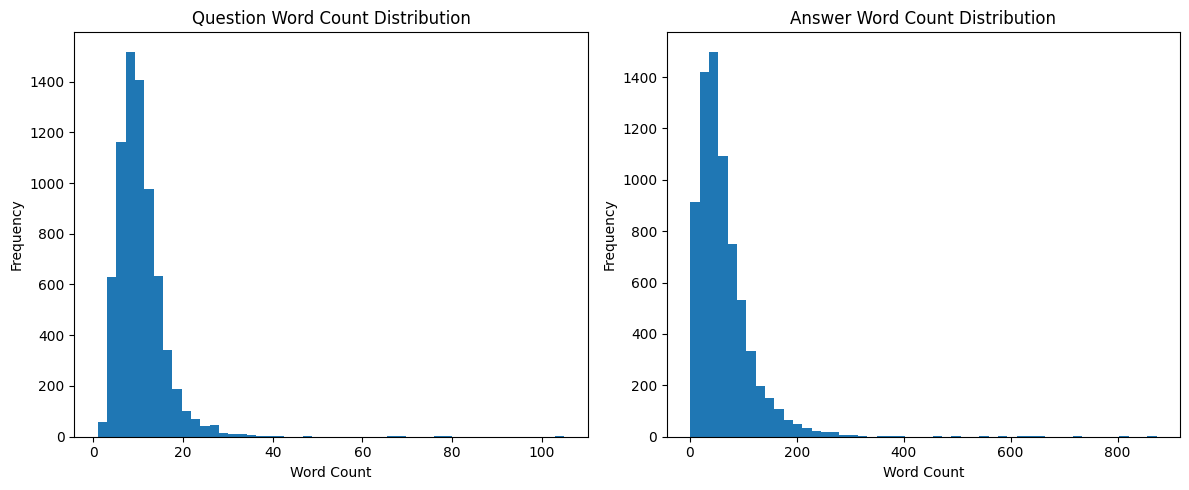

In [ ]:

data_unique['question_word_count'] = data_unique['Question'].str.split().apply(len)
data_unique['answer_word_count'] = data_unique['Answer'].str.split().apply(len)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data_unique['question_word_count'], bins=50)
plt.title("Question Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data_unique['answer_word_count'], bins=50)
plt.title("Answer Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

- Most questions are short and in range around 10-90 words.
- Similarly most answers are also in range of 10-800 words.
- Both question and answer word counts highlight right squeued distribution thus longer questions and answers are less frequent in the dataset.

In [ ]:
data_unique['question_word_count'].describe()

,question_word_count
count,7230.000000
mean,10.610512
std,5.135880
min,1.000000
25%,7.000000
50%,10.000000
75%,13.000000
max,105.000000


- The longest question is of 105 words and the shortest is of 1 word.
- Most questions has between 7 and 13 words with a average of 10 words.

In [ ]:
# Filter rows where 'answer_word_count' is 1
min_question_rows = data_unique[data_unique['question_word_count'] == 1]

print("Rows with Minimum Question Word Count (1):")
display(min_question_rows)

Rows with Minimum Question Word Count (1):


,Source URL,Question,Answer,question_word_count,answer_word_count
689,https://aws.amazon.com/caching/,Ecommerce,Modern eCommerce applications are becoming mor...,1,103
691,https://aws.amazon.com/caching/,Gaming,Interactivity is a cornerstone requirement for...,1,110
696,https://aws.amazon.com/caching/,Media,Media companies often deal with the need to tr...,1,158
697,https://aws.amazon.com/caching/,Mobile,Mobile applications are an incredibly fast gro...,1,150


- Thus indicating that not all Question sections are direct questions but are mapping of source url and knowledgebase available on the portal for that AWS service to further train the model based on this mappings

In [ ]:
data_unique['answer_word_count'].describe()

,answer_word_count
count,7230.000000
mean,63.108852
std,52.307569
min,1.000000
25%,29.000000
50%,51.000000
75%,81.000000
max,873.000000


- Most of the answers length are comparitively longer than that of questions indicated by the mean value.
- The longest answer has 873 words.
- Most answers are has words in range of 29 to 81 words.


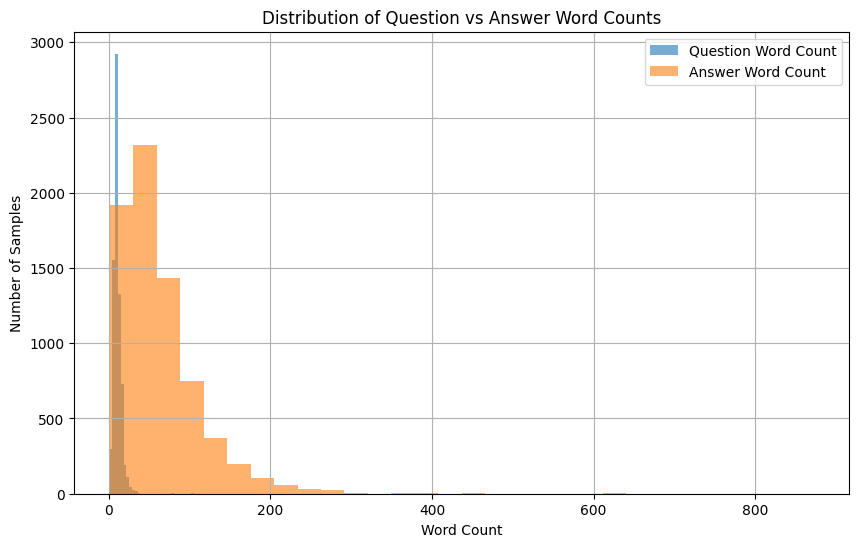

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(data_unique['question_word_count'], bins=30, alpha=0.6, label='Question Word Count')
plt.hist(data_unique['answer_word_count'], bins=30, alpha=0.6, label='Answer Word Count')

plt.xlabel('Word Count')
plt.ylabel('Number of Samples')
plt.title('Distribution of Question vs Answer Word Counts')
plt.legend()
plt.grid(True)
plt.show()


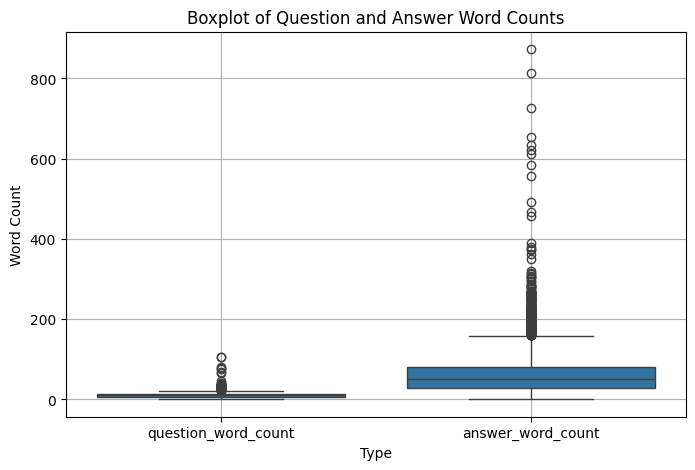

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Melt the DataFrame for seaborn boxplot
melted_df = data_unique[['question_word_count', 'answer_word_count']].melt(var_name='Type', value_name='Word Count')

sns.boxplot(x='Type', y='Word Count', data=melted_df)
plt.title('Boxplot of Question and Answer Word Counts')
plt.grid(True)
plt.show()


In [ ]:
min_answer_rows = data_unique[data_unique['answer_word_count'] == 1]
print("Rows with Minimum Answer Word Count (1):")
display(min_answer_rows)

Rows with Minimum Answer Word Count (1):


,Source URL,Question,Answer,question_word_count,answer_word_count
703,https://aws.amazon.com/certificate-manager/faqs/,Can ACM provide certificates with wildcard dom...,Yes.,8,1
712,https://aws.amazon.com/certificate-manager/faqs/,Can I provision a certificate with ACM if I al...,Yes.,21,1
714,https://aws.amazon.com/certificate-manager/faqs/,Can I use ACM certificates for code signing or...,No.,11,1
719,https://aws.amazon.com/certificate-manager/faqs/,Can I use the same certificate with multiple E...,Yes.,17,1
720,https://aws.amazon.com/certificate-manager/faqs/,Can I validate a wildcard domain name using DN...,Yes.,10,1
728,https://aws.amazon.com/certificate-manager/faqs/,Does ACM provide certificates outside of SSL/TLS?,No.,7,1
729,https://aws.amazon.com/certificate-manager/faqs/,Does ACM provide certificates used to sign and...,No.,12,1
730,https://aws.amazon.com/certificate-manager/faqs/,Does ACM provide public Organizational Validat...,No.,12,1
2214,https://aws.amazon.com/ebs/faqs/,Can I boot an EC2 instance using a Multi-Attac...,No.,11,1
2232,https://aws.amazon.com/ebs/faqs/,Does EBS encryption support boot volumes?,Yes.,6,1


- The shortest answers is of single word as seen below can be a direct 'yes' or 'no' as an answer.


In [ ]:
data_unique.head()

,Source URL,Question,Answer,question_word_count,answer_word_count
0,https://aws.amazon.com/amazon-mq/faqs/,Can I change the default broke configurations ...,"Yes, Amazon MQ allows you to create custom con...",15,27
1,https://aws.amazon.com/amazon-mq/faqs/,Do I need to provision and pay for broker boot...,"No, each broker you provision includes boot vo...",11,15
2,https://aws.amazon.com/amazon-mq/faqs/,Do I pay for inter-node data transfer on Amazo...,"No, all inter-node data transfer is included w...",12,14
3,https://aws.amazon.com/amazon-mq/faqs/,Does Amazon MQ offer Reserved Instance pricing?,"No, Amazon MQ does not offer reserved instance...",7,9
4,https://aws.amazon.com/amazon-mq/faqs/,How am I charged for Amazon MQ?,"With Amazon MQ, you pay only for what you use....",7,45


In [ ]:

model_id = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"

config = AutoConfig.from_pretrained(model_id, trust_remote_code=True)


max_input_length = config.max_position_embeddings

print(f"The maximum input token length for {model_id} is: {max_input_length}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

The maximum input token length for deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B is: 131072


In [ ]:
config

Qwen2Config {
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151643,
  "hidden_act": "silu",
  "hidden_size": 1536,
  "initializer_range": 0.02,
  "intermediate_size": 8960,
  "layer_types": [
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention",
    "full_attention"
  ],
  "max_position_embeddings": 131072,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads":

In [ ]:

tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

data_unique['question_tokens'] = data_unique['Question'].apply(lambda x: len(tokenizer.encode(x)))
data_unique['answer_tokens'] = data_unique['Answer'].apply(lambda x: len(tokenizer.encode(x)))


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

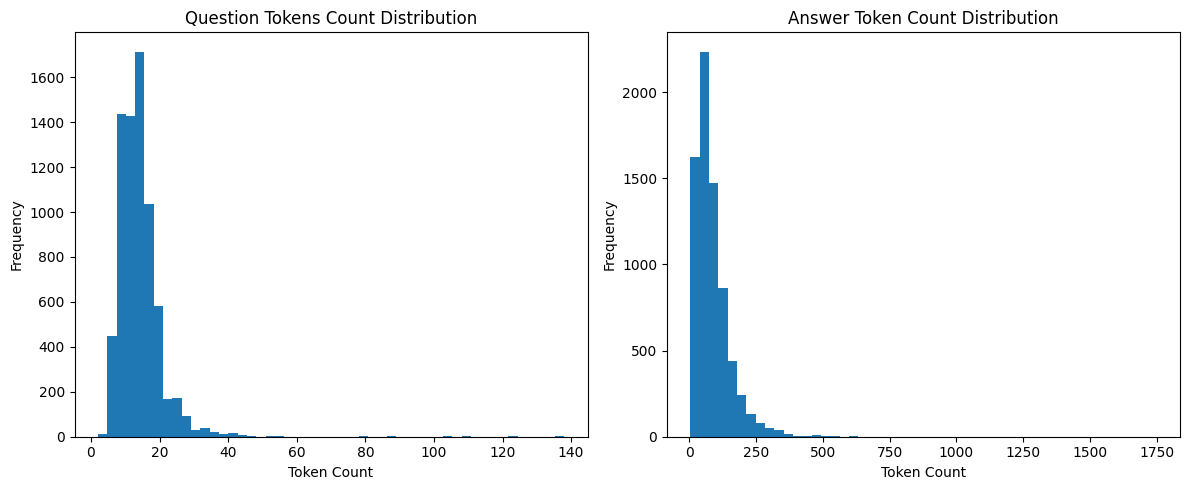

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Question Word Count
plt.subplot(1, 2, 1)
plt.hist(data_unique['question_tokens'], bins=50)
plt.title("Question Tokens Count Distribution")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

# Plot Answer Word Count
plt.subplot(1, 2, 2)
plt.hist(data_unique['answer_tokens'], bins=50)
plt.title("Answer Token Count Distribution")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
data_unique['question_tokens'].describe()

,question_tokens
count,7230.000000
mean,14.038866
std,6.285833
min,2.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,138.000000


In [ ]:
data_unique['answer_tokens'].describe()

,answer_tokens
count,7230.000000
mean,86.319917
std,75.666231
min,3.000000
25%,41.000000
50%,68.000000
75%,110.000000
max,1750.000000


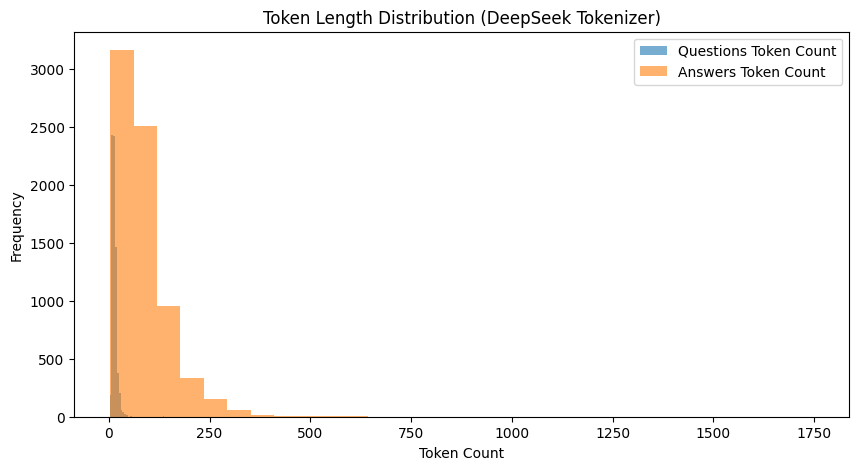

In [ ]:

plt.figure(figsize=(10, 5))
plt.hist(data_unique['question_tokens'], bins=30, alpha=0.6, label='Questions Token Count')
plt.hist(data_unique['answer_tokens'], bins=30, alpha=0.6, label='Answers Token Count')
# plt.axvline(512, color='violet', linestyle='--', label='512 Token Limit')
plt.title("Token Length Distribution (DeepSeek Tokenizer)")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


The maximum input token length for model is 131072 which is far more than 1750 tokens highlighted in above graph, thus the dataset is compatible for training without any need for trunaction and preventing data loss.


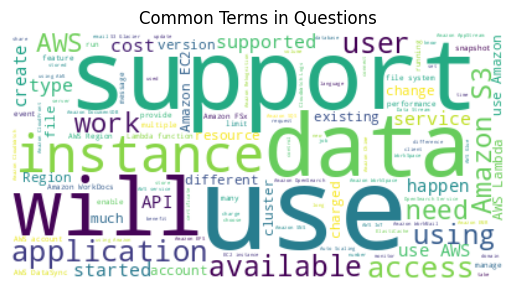

In [ ]:

text = " ".join(data_unique["Question"].tolist())
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Terms in Questions")
plt.show()


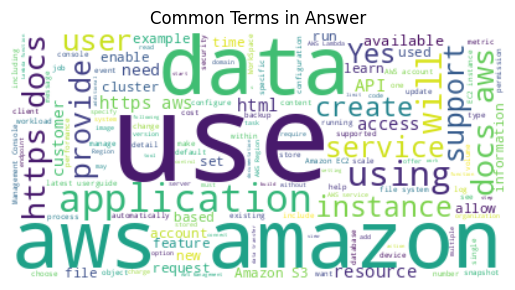

In [ ]:

text = " ".join(data_unique["Answer"].tolist())
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Terms in Answer")
plt.show()


In [ ]:
# Reset to default (10 rows)
# pd.reset_option('display.max_rows')

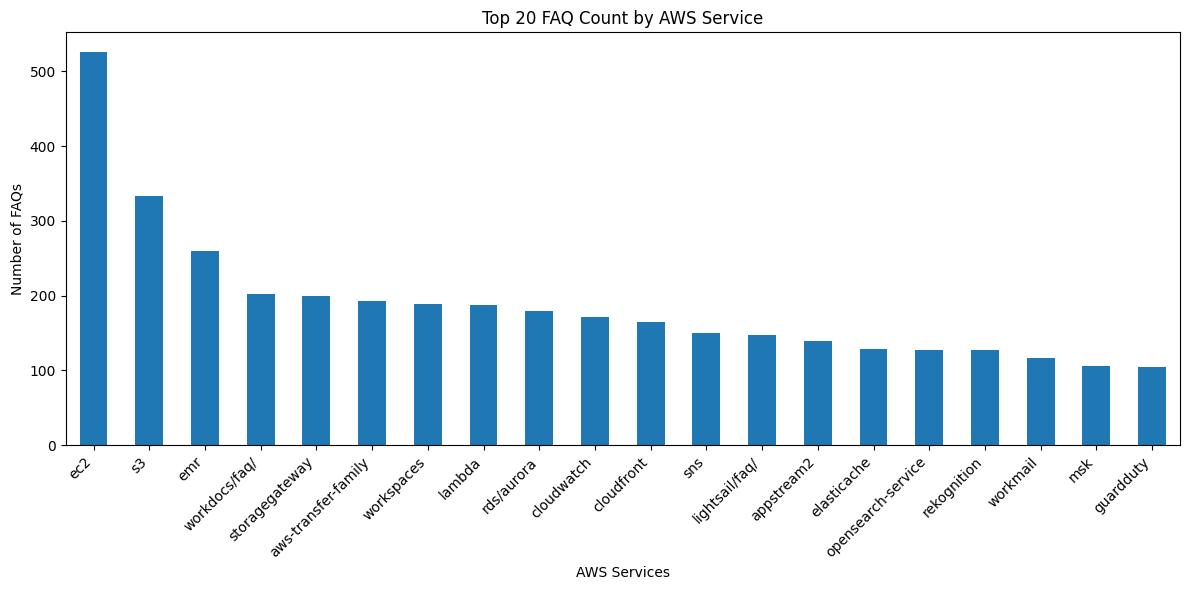

In [ ]:

data_unique["Short URL"] = data_unique["Source URL"].str.replace("https://aws.amazon.com/", "", regex=False).str.replace("/faqs/", "", regex=False)

url_counts = data_unique["Short URL"].value_counts()

# Select the top 20 URLs
top_20_urls = url_counts.head(20)

plt.figure(figsize=(12, 6))
top_20_urls.plot(kind='bar')
plt.title("Top 20 FAQ Count by AWS Service")
plt.xlabel("AWS Services")
plt.ylabel("Number of FAQs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data_unique['Source URL'].nunique()

108

In [ ]:
data_unique.head(2)

,Source URL,Question,Answer,question_word_count,answer_word_count,question_tokens,answer_tokens,Short URL
0,https://aws.amazon.com/amazon-mq/faqs/,Can I change the default broke configurations ...,"Yes, Amazon MQ allows you to create custom con...",15,27,17,55,amazon-mq
1,https://aws.amazon.com/amazon-mq/faqs/,Do I need to provision and pay for broker boot...,"No, each broker you provision includes boot vo...",11,15,13,18,amazon-mq


In [ ]:
data_unique["question_type"] = data_unique["Question"].str.extract(r"^(What|How|Why|Can|Does|Is|Are|Do|Where|When|Should|Could|Will|Which|If|Who)", expand=False)
data_unique['question_type'] = data_unique['question_type'].fillna('Other')
print(data_unique["question_type"].value_counts())

question_type
What      2070
How       1997
Can       1106
Does       350
Is         223
Other      220
Which      220
Do         208
Why        165
When       160
Will       141
Are        131
If          88
Where       78
Who         64
Should       8
Could        1
Name: count, dtype: int64


In [ ]:
data_unique

,Source URL,Question,Answer,question_word_count,answer_word_count,question_tokens,answer_tokens,Short URL,question_type
0,https://aws.amazon.com/amazon-mq/faqs/,Can I change the default broke configurations ...,"Yes, Amazon MQ allows you to create custom con...",15,27,17,55,amazon-mq,Can
1,https://aws.amazon.com/amazon-mq/faqs/,Do I need to provision and pay for broker boot...,"No, each broker you provision includes boot vo...",11,15,13,18,amazon-mq,Do
2,https://aws.amazon.com/amazon-mq/faqs/,Do I pay for inter-node data transfer on Amazo...,"No, all inter-node data transfer is included w...",12,14,16,18,amazon-mq,Do
3,https://aws.amazon.com/amazon-mq/faqs/,Does Amazon MQ offer Reserved Instance pricing?,"No, Amazon MQ does not offer reserved instance...",7,9,9,12,amazon-mq,Does
4,https://aws.amazon.com/amazon-mq/faqs/,How am I charged for Amazon MQ?,"With Amazon MQ, you pay only for what you use....",7,45,9,67,amazon-mq,How
...,...,...,...,...,...,...,...,...,...
7225,https://aws.amazon.com/xray/faqs/,What types of applications can I use with X-Ray?,X-Ray can be used with distributed application...,9,43,12,50,xray,What
7226,https://aws.amazon.com/xray/faqs/,Which AWS services can I use with X-Ray?,You can use X-Ray with applications running on...,8,49,11,67,xray,Which
7227,https://aws.amazon.com/xray/faqs/,Why do I sometimes see partial traces?,X-Ray makes the best effort to present complet...,7,47,9,61,xray,Why
7228,https://aws.amazon.com/xray/faqs/,Why should I use X-Ray?,"Currently, if you build and run distributed ap...",5,158,8,186,xray,Why


/tmp/ipython-input-2391110644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=question_type_counts.index, y=question_type_counts.values, palette='viridis')


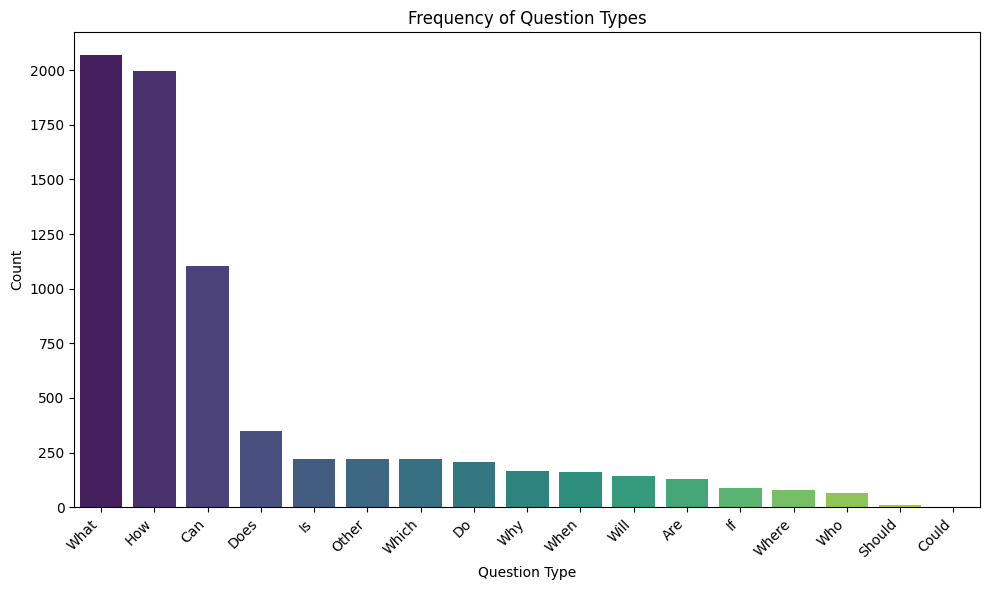

In [ ]:

# Count the occurrences of each question type
question_type_counts = data_unique["question_type"].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=question_type_counts.index, y=question_type_counts.values, palette='viridis')
plt.title("Frequency of Question Types")
plt.xlabel("Question Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of each question type
question_type_counts = data_unique["question_type"].value_counts()

print("Count of each Question Type:")
display(question_type_counts)


Count of each Question Type:


,count
question_type,
What,2070
How,1997
Can,1106
Does,350
Is,223
Other,220
Which,220
Do,208
Why,165


Thus most of the questions are related to understanding the concepts and services offered by the platform followed by how can it be utilized by users.

# Data Pre-processing

In [ ]:

samples = []

for _, row in df.iterrows():
  samples.append({
      "instruction": "Answer the following AWS FAQ question.",
      "input": row['Question'],  # <-- Only question as input
      "output": f"{row['Answer']} [Source: {row['Source URL']}]"  # <-- Append source to output
  })

# Save in JSONL format
output_jsonl_path = "/content/aws_faq_instruction_dataset.jsonl"
with open(output_jsonl_path, "w") as f:
    for sample in samples:
        f.write(json.dumps(sample) + "\n")


In [ ]:
print(samples[0])

{'instruction': 'Answer the following AWS FAQ question.', 'input': 'Can I change the default broke configurations or upload a new configuration to Amazon MQ?', 'output': 'Yes, Amazon MQ allows you to create custom configurations and apply them to new and existing clusters. For more information on custom configurations, see theconfiguration documentation. (https://docs.aws.amazon.com/amazon-mq/latest/developer-guide/managing-broker-configurations.html) [Source: https://aws.amazon.com/amazon-mq/faqs/]'}


For stratify split based on 'Source URL' ensuring we have minimum two samples for source urls to avoid error while splitting

In [ ]:

# Set option to display all rows
pd.set_option('display.max_rows', None)

print(data_unique["Source URL"].value_counts())

Source URL
https://aws.amazon.com/ec2/faqs/                             526
https://aws.amazon.com/s3/faqs/                              334
https://aws.amazon.com/emr/faqs/                             260
https://aws.amazon.com/workdocs/faq/                         202
https://aws.amazon.com/storagegateway/faqs/                  199
https://aws.amazon.com/aws-transfer-family/faqs/             193
https://aws.amazon.com/workspaces/faqs/                      189
https://aws.amazon.com/lambda/faqs/                          187
https://aws.amazon.com/rds/aurora/faqs/                      179
https://aws.amazon.com/cloudwatch/faqs/                      171
https://aws.amazon.com/cloudfront/faqs/                      165
https://aws.amazon.com/sns/faqs/                             150
https://aws.amazon.com/lightsail/faq/                        147
https://aws.amazon.com/appstream2/faqs/                      140
https://aws.amazon.com/elasticache/faqs/                     129
https://aws.am

In [ ]:

# keeping only classes (Source URL) with ≥3 samples
# Filter based on data_unique instead of df
source_counts = data_unique['Source URL'].value_counts()
valid_sources = source_counts[source_counts >= 3].index
df_filtered = data_unique[data_unique['Source URL'].isin(valid_sources)].reset_index(drop=True)

train_df, temp_df = train_test_split(df_filtered,test_size=0.2,stratify=df_filtered['Source URL'],random_state=42)

In [ ]:
df_filtered['Source URL'].value_counts()

,count
Source URL,
https://aws.amazon.com/ec2/faqs/,526
https://aws.amazon.com/s3/faqs/,334
https://aws.amazon.com/emr/faqs/,260
https://aws.amazon.com/workdocs/faq/,202
https://aws.amazon.com/storagegateway/faqs/,199
https://aws.amazon.com/aws-transfer-family/faqs/,193
https://aws.amazon.com/workspaces/faqs/,189
https://aws.amazon.com/lambda/faqs/,187
https://aws.amazon.com/rds/aurora/faqs/,179


In [ ]:

# Get Source URLs with ≥2 samples in temp_df (required for stratification)
temp_source_counts = temp_df['Source URL'].value_counts()
valid_temp_sources = temp_source_counts[temp_source_counts >= 2].index
temp_df_valid = temp_df[temp_df['Source URL'].isin(valid_temp_sources)]

In [ ]:
temp_df_valid['Source URL'].value_counts()

,count
Source URL,
https://aws.amazon.com/ec2/faqs/,105
https://aws.amazon.com/s3/faqs/,67
https://aws.amazon.com/emr/faqs/,52
https://aws.amazon.com/workdocs/faq/,41
https://aws.amazon.com/storagegateway/faqs/,40
https://aws.amazon.com/aws-transfer-family/faqs/,39
https://aws.amazon.com/workspaces/faqs/,38
https://aws.amazon.com/lambda/faqs/,38
https://aws.amazon.com/rds/aurora/faqs/,36


In [ ]:


# Proceed with stratified split on this subset
val_df, test_df = train_test_split(temp_df_valid,test_size=0.5,stratify=temp_df_valid['Source URL'],random_state=42)

# Remaining single-sample classes
temp_df_remaining = temp_df[~temp_df.index.isin(temp_df_valid.index)]


# Convert to HuggingFace datasets
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

for ds_name, ds in {"train": train_dataset, "val": eval_dataset, "test": test_dataset}.items():
    if "__index_level_0__" in ds.column_names:
        locals()[f"{ds_name}_dataset"] = ds.remove_columns("__index_level_0__")


In [ ]:
train_dataset[0]

{'Source URL': 'https://aws.amazon.com/windows/faq/',
 'Question': 'What are my options for running Microsoft software that is approaching EOS?',
 'Answer': 'AWS customers running EOS software on EC2 instances have several options:',
 'question_word_count': 12,
 'answer_word_count': 11,
 'question_tokens': 14,
 'answer_tokens': 14,
 'Short URL': 'windows/faq/',
 'question_type': 'What'}

In [ ]:
print(f"Total samples after filtering: {len(df_filtered)}")
print(f"Unique Source URLs retained: {df_filtered['Source URL'].nunique()}")
print("Min samples per Source URL:", df_filtered['Source URL'].value_counts().min())


Total samples after filtering: 7227
Unique Source URLs retained: 105
Min samples per Source URL: 3


In [ ]:
train_dataset[0]

{'Source URL': 'https://aws.amazon.com/windows/faq/',
 'Question': 'What are my options for running Microsoft software that is approaching EOS?',
 'Answer': 'AWS customers running EOS software on EC2 instances have several options:',
 'question_word_count': 12,
 'answer_word_count': 11,
 'question_tokens': 14,
 'answer_tokens': 14,
 'Short URL': 'windows/faq/',
 'question_type': 'What'}

In [ ]:
# Add to validation set
val_df = pd.concat([val_df, temp_df_remaining], ignore_index=True)
def format_for_dataset(row):
    return {
        "instruction": "Answer the following AWS FAQ question",
        "input": row['Question'],
        "output": f"{row['Answer']} [Source: {row['Source URL']}]"
    }

train_df = train_df.apply(format_for_dataset, axis=1).apply(pd.Series)
val_df = val_df.apply(format_for_dataset, axis=1).apply(pd.Series)
test_df = test_df.apply(format_for_dataset, axis=1).apply(pd.Series)

# Converting to HuggingFace datasets
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)


In [ ]:
train_dataset[0]

{'instruction': 'Answer the following AWS FAQ question',
 'input': 'What are my options for running Microsoft software that is approaching EOS?',
 'output': 'AWS customers running EOS software on EC2 instances have several options: [Source: https://aws.amazon.com/windows/faq/]',
 '__index_level_0__': 6693}

In [ ]:
print(train_dataset[:5])

{'instruction': ['Answer the following AWS FAQ question', 'Answer the following AWS FAQ question', 'Answer the following AWS FAQ question', 'Answer the following AWS FAQ question', 'Answer the following AWS FAQ question'], 'input': ['What are my options for running Microsoft software that is approaching EOS?', 'What are the benefits of zero-ETL?', 'Can I use Neptune Database in Amazon Virtual Private Cloud (Amazon VPC)?', 'What is an Amazon EFS Access Point?', 'What security measures does Amazon Comprehend have?'], 'output': ['AWS customers running EOS software on EC2 instances have several options: [Source: https://aws.amazon.com/windows/faq/]', 'Increased agility: Zero-ETL simplifies data architecture and reduces data-engineering efforts. It allows for the inclusion of new data sources without the need to reprocess large amounts of data. This flexibility enhances agility, supporting data-driven decision-making and rapid innovation.Cost-efficiency: Zero-ETL uses data integration techn

In [ ]:
print(test_dataset[:2])

{'instruction': ['Answer the following AWS FAQ question', 'Answer the following AWS FAQ question'], 'input': ['Which AWS regions offer server-side encryption for Kinesis Data Streams?', 'Can I lock a document to prevent it from receiving further feedback?'], 'output': ['Kinesis Data Streams server-side encryption is available in the AWS GovCloud Region and all public Regions except the China (Beijing) Region. [Source: https://aws.amazon.com/kinesis/data-streams/faqs/]', 'Yes, you can disable feedback for a document and prevent it from receiving additional comments. You can re-enable feedback and users will be able to post comments again. [Source: https://aws.amazon.com/workdocs/faq/]'], '__index_level_0__': [4161, 6715]}


In [ ]:
print(eval_dataset[:2])

{'instruction': ['Answer the following AWS FAQ question', 'Answer the following AWS FAQ question'], 'input': ['What are the key benefits of using gRPC with Amazon CloudFront?', 'How can I customize Amazon Kendra to better fit my companys domain or business specialty?'], 'output': ['Security - gRPC uses HTTP/2, which ensures traffic is end-to-end encrypted from the client to your origin servers. Additionally, when using gRPC, you get AWS Shield Standard at no additional cost and AWS WAF can be configured to helps protect gRPC traffic from attacks.Better performance - gRPC leverages a binary message format, called Protocol Buffers, which are smaller than traditional payloads, like JSON used with RESTful APIs. Parsing Protocol Buffers is less CPU-intensive because data is in a binary format which means that messages are exchanged faster. This results in better overall performance.Built-in streaming support - Streaming is a built-in part of the gRPC framework and supports both client-side 

In [ ]:

for sample in train_dataset.select(range(2)):
    print(sample)


{'instruction': 'Answer the following AWS FAQ question', 'input': 'What are my options for running Microsoft software that is approaching EOS?', 'output': 'AWS customers running EOS software on EC2 instances have several options: [Source: https://aws.amazon.com/windows/faq/]', '__index_level_0__': 6693}
{'instruction': 'Answer the following AWS FAQ question', 'input': 'What are the benefits of zero-ETL?', 'output': 'Increased agility: Zero-ETL simplifies data architecture and reduces data-engineering efforts. It allows for the inclusion of new data sources without the need to reprocess large amounts of data. This flexibility enhances agility, supporting data-driven decision-making and rapid innovation.Cost-efficiency: Zero-ETL uses data integration technologies that are cloud-native and scalable, allowing businesses to optimize costs based on actual usage and data-processing needs. Organizations reduce infrastructure costs, development efforts, and maintenance overheads.Fast time to in

In [ ]:
print(f"Size of training set: {len(train_dataset)}")
print(f"Size of test set: {len(eval_dataset)}")
print(f"Size of test set: {len(test_dataset)}")


Size of training set: 5781
Size of test set: 725
Size of test set: 721


In [ ]:

# Save train
with open("train.jsonl", "w") as f:
    for item in train_dataset:
        f.write(json.dumps(item) + "\n")

# Save validation
with open("val.jsonl", "w") as f:
    for item in eval_dataset:
        f.write(json.dumps(item) + "\n")

# Save test
with open("test.jsonl", "w") as f:
    for item in test_dataset:
        f.write(json.dumps(item) + "\n")
